In [8]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
sns.set(font_scale=1.25, style='whitegrid')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

df_plot=pd.read_csv("blackbox_results.csv")

Index(['algorithm', 'dataset', 'rmse_test', 'log_mse_test', 'r2_test',
       'model_size', 'training time (s)'],
      dtype='object')

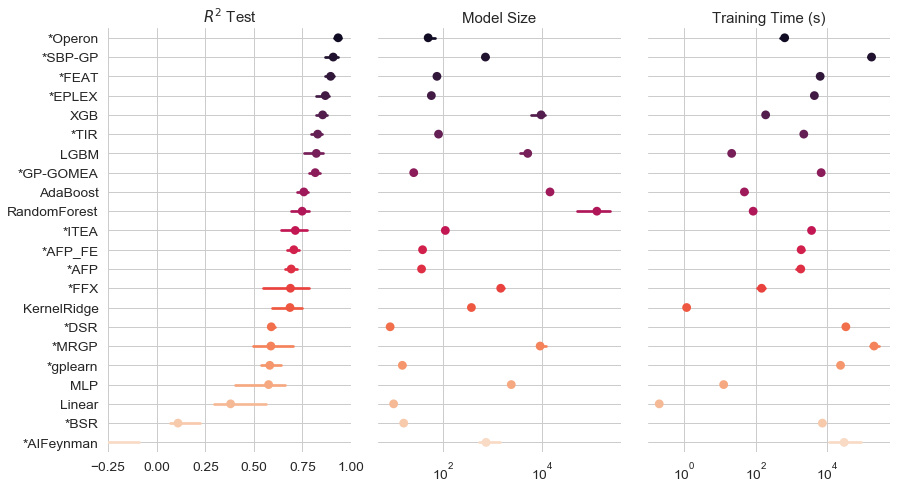

In [3]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        'model_size',
        'training time (s)',
]
order = df_plot.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 

g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )

# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/main_results.pdf", bbox_inches='tight')

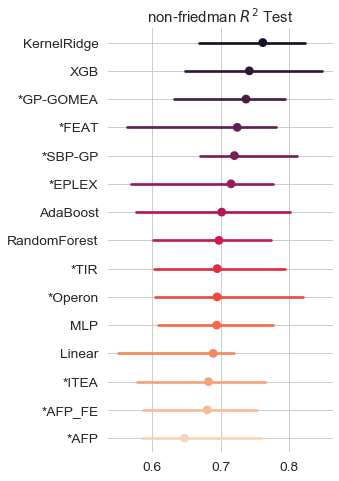

In [4]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plot[~df_plot.dataset.str.contains("_fri_")]#.sort_values(by='r2_test',ascending=False).head(10)

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/nonfri_results.pdf", bbox_inches='tight')

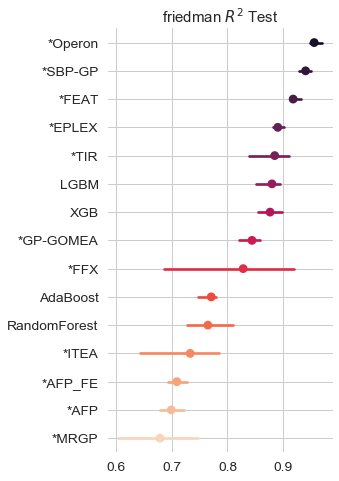

In [5]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plot[df_plot.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/fri_results.pdf", bbox_inches='tight')

In [7]:
# Make the PairGrid
sns.set_style("whitegrid")

df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty
#dfg = df_p[df_p.algorithm == 'TIRMOO2'].groupby('dataset')[x_vars[0]].median()
#df_p = df_p[df_p.dataset.isin(dfg.index)]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([.6,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_results.pdf", bbox_inches='tight')


KeyError: 'Column not found: r2_train'

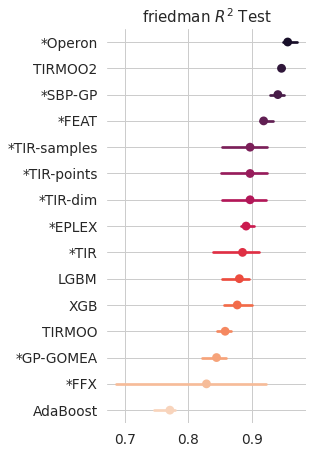

In [4]:
# Make the PairGrid
sns.set_style("whitegrid")

df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_fri_results.pdf", bbox_inches='tight')

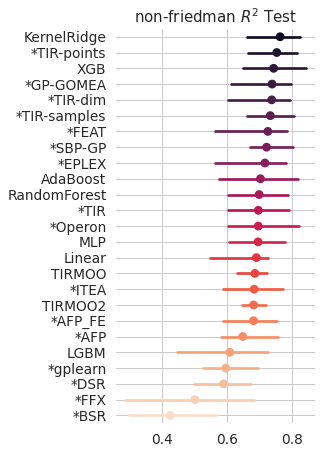

In [7]:
# Make the PairGrid
sns.set_style("whitegrid")

df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:25]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_nonfri_results.pdf", bbox_inches='tight')

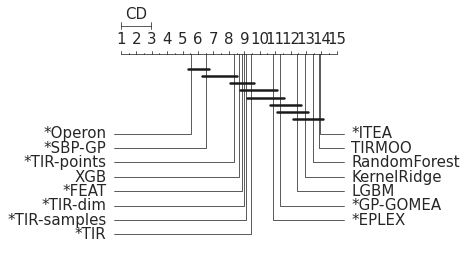

In [10]:
import Orange

# critical difference for Nemenyi with alpha=0.05
def cd_plot(df, pname):
    df_pivot = pd.pivot_table(df, index='algorithm', columns=['dataset'], values='r2_test')
    n = len(df_pivot.columns)
    ranks = df_pivot.rank(ascending=False).mean(axis=1).sort_values(ascending=True)    
    names = ranks.index.values[:15]
    avranks = ranks.values[:15]
    
    cd = Orange.evaluation.compute_CD(avranks, n)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
    plt.savefig(pname, bbox_inches='tight')
        
cd_plot(df_plotPenalty, "figs/cd_results.pdf")

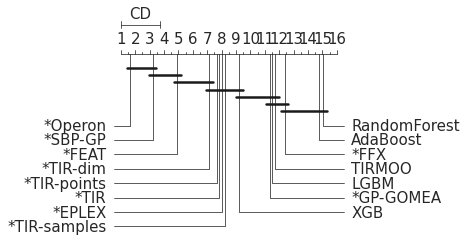

In [11]:
cd_plot(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], "figs/cd_fri_results.pdf")

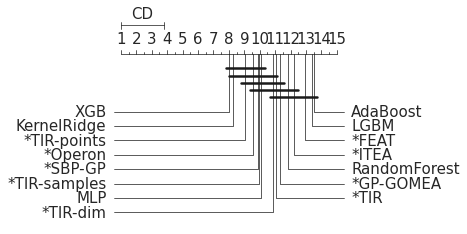

In [12]:
cd_plot(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")],"figs/cd_nonfri_results.pdf")


In [9]:
moo2 = pd.pivot_table(df_plotPenalty[(df_plotPenalty.algorithm == "TIRMOO2") | (df_plotPenalty.algorithm == "*TIR-points")], index='algorithm', columns=['dataset'], values='r2_test')
serie = moo2.loc["*TIR-points"] > moo2.loc["TIRMOO2"]
test = {k for k, v in serie.iteritems() if v}

print(test)

{'649_fri_c0_500_5', '1028_SWD', '651_fri_c0_100_25', '635_fri_c0_250_10', '542_pollution', '215_2dplanes', '597_fri_c2_500_5', '556_analcatdata_apnea2', '228_elusage', '547_no2', '560_bodyfat', '615_fri_c4_250_10', '1096_FacultySalaries', '344_mv', '519_vinnie', '594_fri_c2_100_5', '621_fri_c0_100_10', '627_fri_c2_500_10', '665_sleuth_case2002', '706_sleuth_case1202', '687_sleuth_ex1605', '695_chatfield_4', '1203_BNG_pwLinear', '561_cpu', '1595_poker', '522_pm10', '573_cpu_act', '230_machine_cpu', '678_visualizing_environmental', '562_cpu_small', '712_chscase_geyser1', '523_analcatdata_neavote', '591_fri_c1_100_10', '505_tecator', '595_fri_c0_1000_10', '537_houses', '574_house_16H', '207_autoPrice', '613_fri_c3_250_5', '192_vineyard', '4544_GeographicalOriginalofMusic', '666_rmftsa_ladata', '210_cloud', '1089_USCrime', '527_analcatdata_election2000', '659_sleuth_ex1714', '557_analcatdata_apnea1', '227_cpu_small', '654_fri_c0_500_10', '634_fri_c2_100_10', '485_analcatdata_vehicle', '60

In [8]:
df_plotPenalty

,algorithm,dataset,rmse_test,log_mse_test,r2_test,model_size,training time (s)
0,*AFP,1027_ESL,0.604193,0.311190,0.830930,20.5,1210.966865
1,*AFP,1028_SWD,0.661833,0.363269,0.314517,47.0,3017.658321
2,*AFP,1029_LEV,0.658121,0.359856,0.521904,23.5,2622.206193
3,*AFP,1030_ERA,1.579928,1.251668,0.358716,36.5,3007.024177
4,*AFP,1089_USCrime,23.439775,6.310687,0.639671,25.0,590.939726
...,...,...,...,...,...,...,...
4251,TIRMOO,results_test/643_fri_c2_500_25,0.425942,-1.706902,0.795625,67.0,40.688432
4252,TIRMOO,results_test/663_rabe_266,1.187408,0.343546,0.999421,67.0,293.802652
4253,TIRMOO,results_test/583_fri_c1_1000_50,0.531343,-1.264693,0.638178,61.0,24.891787
4254,TIRMOO,results_test/637_fri_c1_500_50,0.481314,-1.462471,0.769264,44.0,16.173323
